# Assignment | 5th April 2023

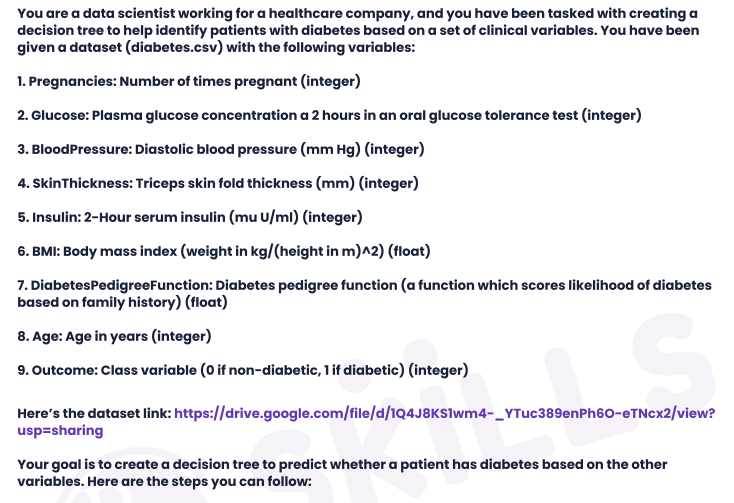

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

Ans.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Display the first 5 rows of the dataset
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
# Display the dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [5]:
# Display descriptive statistics of the dataset
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

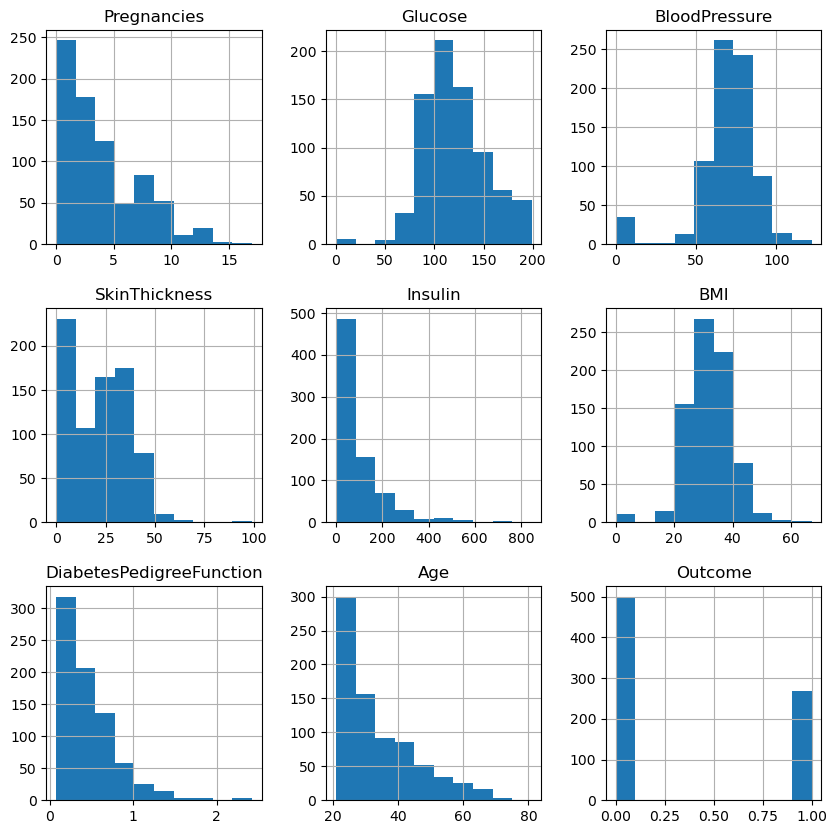

In [6]:
# Create histograms of each variable
df.hist(figsize=(10,10))
plt.show()

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

Ans.

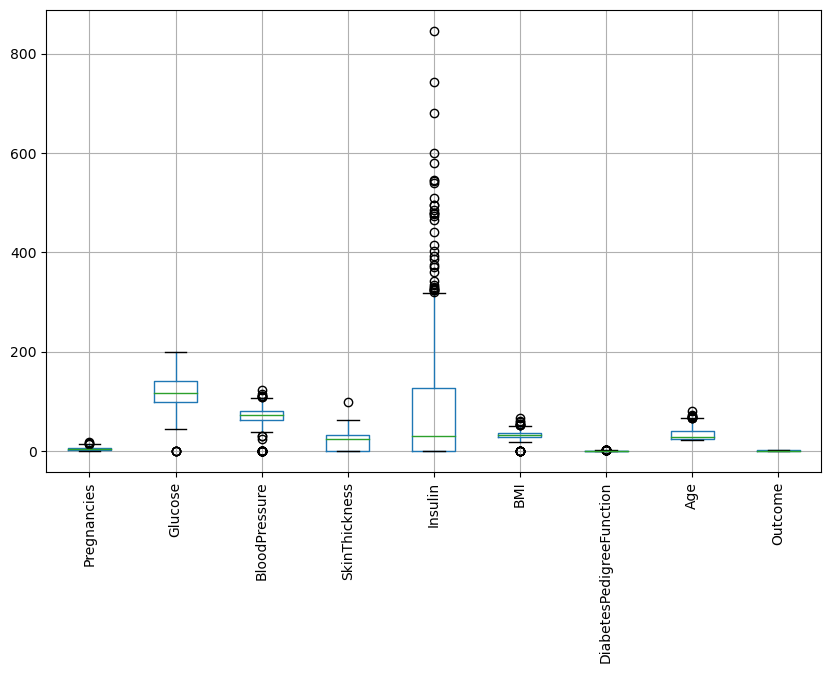

In [7]:
# Create box plots of each variable
df.boxplot(figsize=(10,6),rot=90)
plt.show()

In [8]:
# Calculate the IQR of each variable
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [9]:
# Check for categorical variables
print(df.nunique())

Pregnancies                  14
Glucose                     132
BloodPressure                39
SkinThickness                48
Insulin                     148
BMI                         227
DiabetesPedigreeFunction    442
Age                          46
Outcome                       2
dtype: int64


Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

Ans

In [10]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

Ans.

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the decision tree classifier
tree = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters to optimize
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(tree, params, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Train the decision tree model with the best hyperparameters
best_tree = grid_search.best_estimator_
best_tree.fit(X_train, y_train)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


DecisionTreeClassifier(max_depth=2, random_state=42)

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Ans.

Accuracy: 0.7578125
Precision: 0.6470588235294118
Recall: 0.3055555555555556
F1 Score: 0.41509433962264153


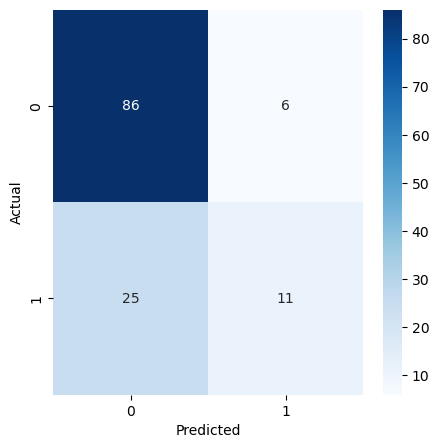

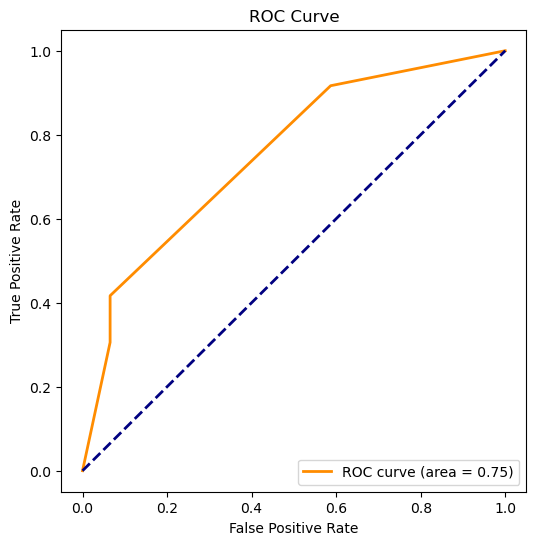

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix

# Predict the class labels of the test set
y_pred = best_tree.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the ROC curve
y_prob = best_tree.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

Ans.

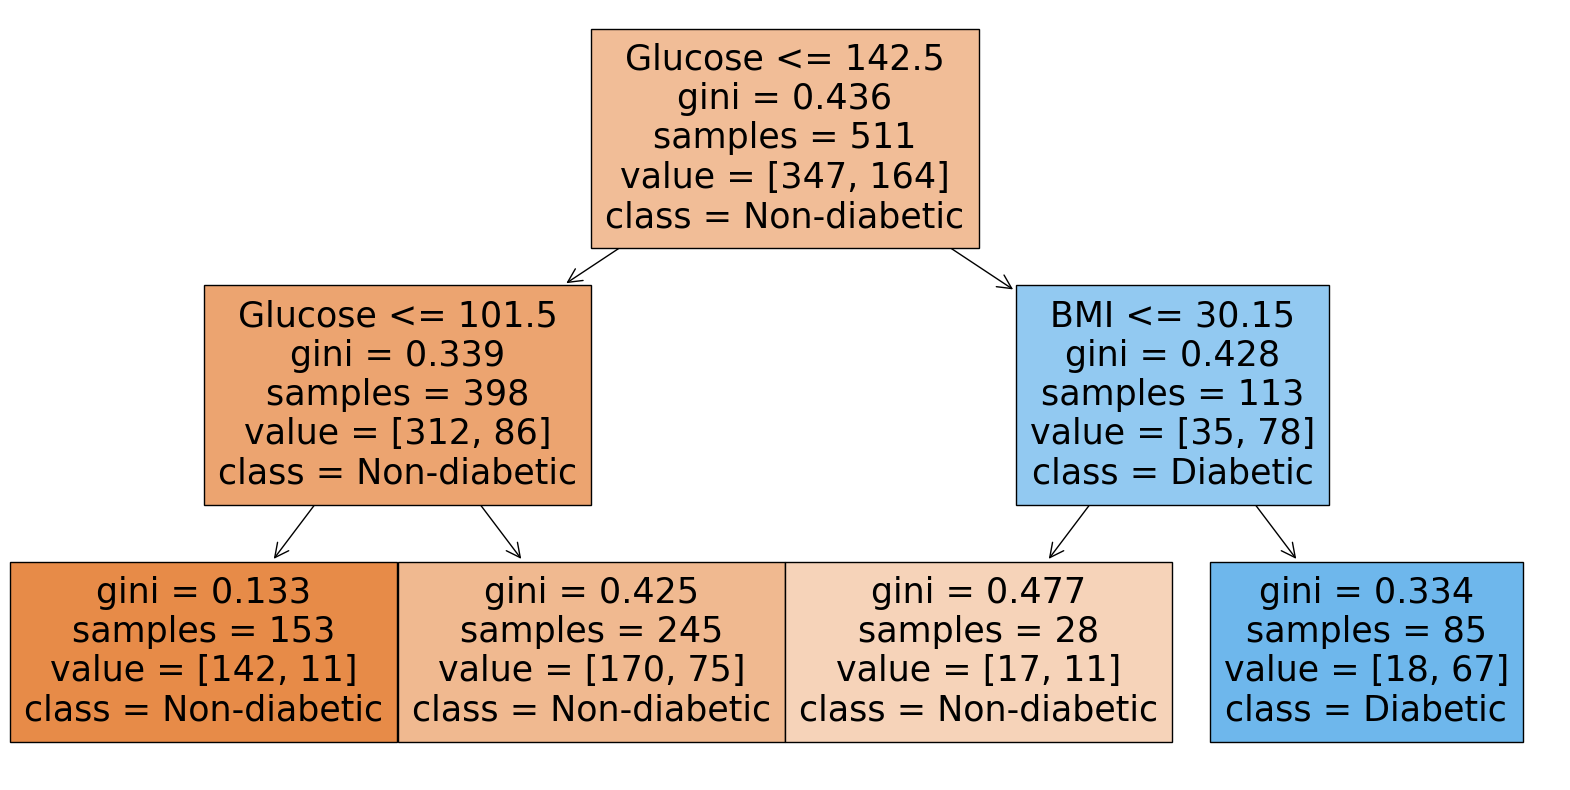

In [13]:
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(best_tree, feature_names=X_train.columns, class_names=['Non-diabetic', 'Diabetic'], filled=True)
plt.show()


Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

Ans.

Validating the decision tree model is an important step to ensure that it is robust and reliable when applied to new data or in different scenarios. Here are some ways to validate the decision tree model:

- Test the model on a holdout dataset: We can further validate the decision tree model by testing it on a completely new dataset that was not used for training or tuning the hyperparameters. This will help us to determine if the model is overfitting to the training data and generalize well to new data.

- Perform sensitivity analysis: Sensitivity analysis involves testing the model's response to small changes in the input variables. We can use this technique to identify which variables have the most impact on the model's predictions, and to identify potential weaknesses or uncertainties in the model. For example, we can simulate different scenarios by varying the values of the input variables and observing the changes in the model's predictions.

- Perform scenario testing: Scenario testing involves testing the model's performance under different conditions or assumptions. For example, we can simulate scenarios where certain variables are missing or where the distribution of the variables is different from what was observed in the training data. This will help us to identify potential risks or limitations of the model in different scenarios.

- Compare the model's performance to other models: We can also validate the decision tree model by comparing its performance to other models that are commonly used for predicting diabetes, such as logistic regression, random forests, or neural networks. This will help us to determine if the decision tree model is the best choice for the particular application, and if there are alternative models that can provide better performance.

In summary, validating the decision tree model is a crucial step to ensure that it is robust and reliable when applied to new data or in different scenarios. By performing sensitivity analysis, scenario testing, and comparing the model's performance to other models, we can gain a better understanding of the strengths and weaknesses of the model, and make informed decisions about its use.

Example of 'Perform sensitivity analysis':

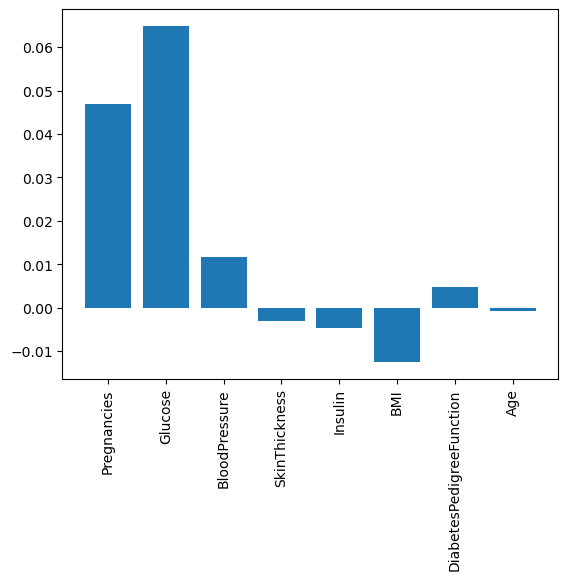

In [15]:
from sklearn.inspection import permutation_importance

# Compute the feature importances using permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Plot the feature importances
plt.bar(X.columns, result.importances_mean)
plt.xticks(rotation=90)
plt.show()
